# PNEUMONIA DETECTION WITH DEEP LEARNING USING X-RAY IMAGES

## INTRODUCTION

Pneumonia is a common and potentially serious respiratory infection that affects the lungs. It can be caused by various pathogens, including bacteria, viruses, fungi, and even certain chemicals or irritants. Pneumonia occurs when these agents enter the lungs and cause inflammation in the air sacs, known as alveoli, which can fill with pus or other fluids. This can make it difficult for the affected person to breathe and lead to a range of symptoms, from mild to severe.

 Pneumonia can be caused by a variety of infectious agents. The most common culprits are bacteria like Streptococcus pneumoniae, Haemophilus influenzae, and Mycoplasma pneumoniae, as well as viruses like influenza and the SARS-CoV-2 virus responsible for COVID-19. Fungal and parasitic pneumonia are less common but can occur, especially in individuals with weakened immune systems.Pneumonia symptoms can vary in severity but often include high fever, cough (sometimes with mucus or pus), difficulty breathing, chest pain when breathing or coughing, fatigue, and confusion, especially in older adults. The symptoms may develop gradually or suddenly, depending on the type of pneumonia. Certain factors can increase the risk of developing pneumonia. These include age (very young children and the elderly are more vulnerable), weakened immune systems (due to conditions like HIV/AIDS or cancer treatment), chronic lung diseases (e.g., COPD), smoking, and recent respiratory infections. Doctors often diagnose pneumonia through a combination of physical exams, medical history, and diagnostic tests. These tests may include chest X-rays, blood tests, and sputum cultures to identify the specific pathogen causing the infection.

 Treatment for pneumonia depends on its cause. Bacterial pneumonia is typically treated with antibiotics, while viral pneumonia often requires supportive care, such as rest, fluids, and antiviral medications for some cases. In severe cases, hospitalization may be necessary to provide oxygen and intravenous fluids. Vaccinations are one of the most effective ways to prevent certain types of pneumonia, such as pneumococcal and influenza pneumonia. Good hygiene practices, including frequent handwashing, can also reduce the risk of infection. Quitting smoking and avoiding exposure to environmental toxins can lower the risk of developing pneumonia in some cases.Most cases of pneumonia can be successfully treated, especially when caught early. However, the outcome depends on various factors, including the individual's overall health, the specific pathogen causing the infection, and the promptness of treatment.

## BUSINESS UNDERSTANDING

Nairobi hospital has contracted us to develop a machine learning model which can help the hospital diagnose pneumonia from x-ray images. Pneumonia poses a great risk, as a prevalent and impactful respiratory illness, is of paramount importance not only to healthcare providers and institutions but also to society at large. Pneumonia affects healthcare impact, public health implications, economic considerations, global health initiatives and patient-centered approach.

In the domain of health care, the application of machine learning techniques for pneumonia detection represents a significant intersection of technology and medicine. This project recognizes the need for accurate and efficient pneumonia diagnosis, a critical aspect of patient care and public health. From a business viewpoint, the use of deep learning has far reaching implications. It addresses the challenges faced by healthcare providers in terms of timely diagnosis and effective utilization of resources.By automating the detection process the hospital and medical facilities can potentially reduce the workload on radiologists, expedite treatment decisions, and optimize resource allocation. Additionally, this project acknowledges the economic dimension, where improved pneumonia detection can lead to cost savings for healthcare systems and insurers, as early diagnosis often correlates with better treatment outcomes. Furthermore, the development of deep learning model for pneumonia detection aligns with the broader trends of AI integration into healthcare, presenting opportunities for technology companies and startups specializing in healthcare solutions.

## PROBLEM STATEMENT

Pneumonia remains a significant global health concern, contributing to substantial morbidity and mortality rates. Timely and accurate diagnosis of pneumonia is crucial for effective patient care and reducing the burden on healthcare systems. However, the current diagnostic process, primarily reliant on radiological imaging and clinical expertise, faces challenges related to resource constraints, delays in reporting, and the potential for human error. This project addresses the critical need for an efficient, automated, and reliable pneumonia detection system using deep learning techniques. The problem at hand is to develop and evaluate a deep learning model that can analyze medical images, such as chest X-rays, to accurately identify and classify pneumonia cases. By doing so, this project aims to enhance the speed and precision of pneumonia diagnosis, ultimately improving patient outcomes and streamlining healthcare resource allocation.






### Objectives



1.   Develop a model that can detect pneumonia cases from chest x-ray images.
2.   Train the model using the collected dataset, fine-tune it for optimal performance, sensitivity, specificity and speed.
3. Assess the model's performance using appropriate metrics, such as accuracy, precision, recall, F1-score.



## DATA UNDERSTANDING

We have been provided with a dataset from kaggle[Kaggle dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). The data contains three folders:


*   Train set
*   Val Set
*   Test set

Each of the folders has  sub-folders with 'NORMAL'  and 'PNEUMONIA' classes of chest X-ray images. The dataset is 2GB in size.



## IMPORTING LIBRARIES

In [2]:
!pip install scikeras

In [3]:
#Importing all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import cv2
import hashlib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [4]:
#Connecting to our data which is in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DATA READING

In [5]:
#Setting path to the folder
folder_dir = '/content/drive/MyDrive/chest-xray'

In [6]:
#Viewing the folders in our folder
folder_path = os.listdir(folder_dir)
folder_path

['val', 'test', 'train']

In [7]:
#Create a list of our data file paths
fold_list=[]
for fold in folder_path:
  fold_path = os.path.join(folder_dir, fold)
  fold_list.append(fold_path)
fold_list

['/content/drive/MyDrive/chest-xray/val',
 '/content/drive/MyDrive/chest-xray/test',
 '/content/drive/MyDrive/chest-xray/train']

In [8]:
#Iterate through the list to see what is in the folders
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  print(folders)

Folders inside /content/drive/MyDrive/chest-xray/val:
['NORMAL', 'PNEUMONIA']
Folders inside /content/drive/MyDrive/chest-xray/test:
['PNEUMONIA', 'NORMAL']
Folders inside /content/drive/MyDrive/chest-xray/train:
['PNEUMONIA', 'NORMAL']


From the results each of the folders contains two categories of images i.e 'NORMAL' and 'PNEUMONIA'. We are going to visualize and see how many images each sub-folder contains.

In [9]:
#Iterate through the folders and obtain number of images in each sub-folder
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    files = [f for f in os.listdir(subfold_path)]
    print(f"Number of images in {folder}: {len(files)}")

Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
Number of images in NORMAL: 8
PNEUMONIA
Number of images in PNEUMONIA: 8
Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
Number of images in PNEUMONIA: 387
NORMAL
Number of images in NORMAL: 231
Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
Number of images in PNEUMONIA: 3850
NORMAL
Number of images in NORMAL: 1340


We can see that the validation set has both 8 images of both 'normal' and 'pneumonia', test set has 392 images of 'pneumonia' and 238 images of 'normal' while the train set has 3875 images of 'pneumonia' and 1341 images of 'normal'. We can see that this will pose a huge problem due to class imbalance.

We can try and visualize the size of the images in terms of pixels.

In [10]:
#View size of the iamges
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    files = [f for f in os.listdir(subfold_path)]
    for file_ in files[:8]:
      img = cv2.imread(os.path.join(subfold_path, file_))
      print(img.shape)

Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
(1225, 1632, 3)
(1416, 1736, 3)
(1104, 1328, 3)
(928, 1288, 3)
(1416, 1776, 3)
(1302, 1564, 3)
(1040, 1272, 3)
(1104, 1240, 3)
PNEUMONIA
(592, 968, 3)
(944, 1416, 3)
(1128, 1664, 3)
(664, 1152, 3)
(952, 1192, 3)
(864, 1256, 3)
(656, 1016, 3)
(712, 1072, 3)
Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
(624, 952, 3)
(624, 1128, 3)
(762, 1106, 3)
(680, 1024, 3)
(536, 880, 3)
(696, 1040, 3)
(552, 904, 3)
(840, 1064, 3)
NORMAL
(1509, 2111, 3)
(1945, 2214, 3)
(2155, 2444, 3)
(1238, 1803, 3)
(1326, 1663, 3)
(1837, 2031, 3)
(1478, 1873, 3)
(1916, 2144, 3)
Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
(1014, 1292, 3)
(904, 1248, 3)
(848, 1016, 3)
(872, 1200, 3)
(744, 1112, 3)
(464, 904, 3)
(1352, 1680, 3)
(664, 984, 3)
NORMAL
(1353, 1882, 3)
(1167, 1628, 3)
(970, 1410, 3)
(1480, 1762, 3)
(1024, 1418, 3)
(1395, 1576, 3)
(1128, 1458, 3)
(1017, 1268, 3)


Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
Displaying the first 8 images in NORMAL:


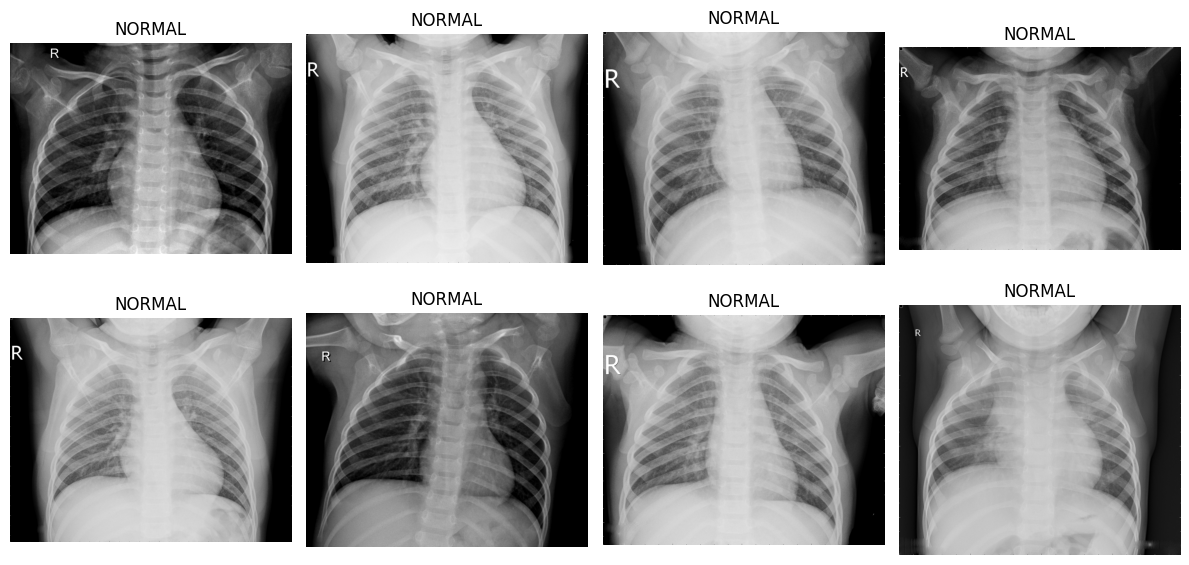

PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


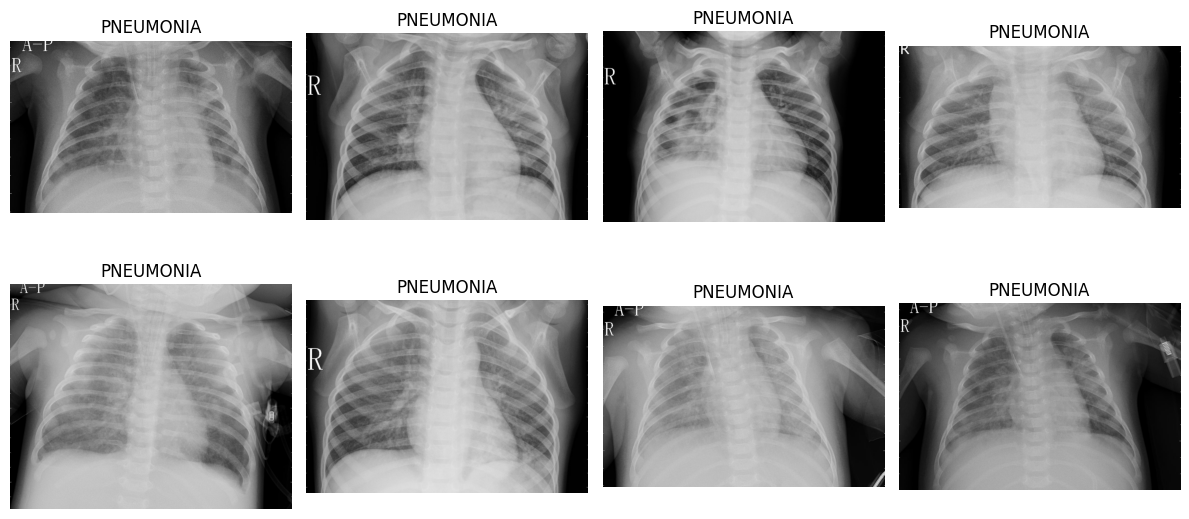

Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


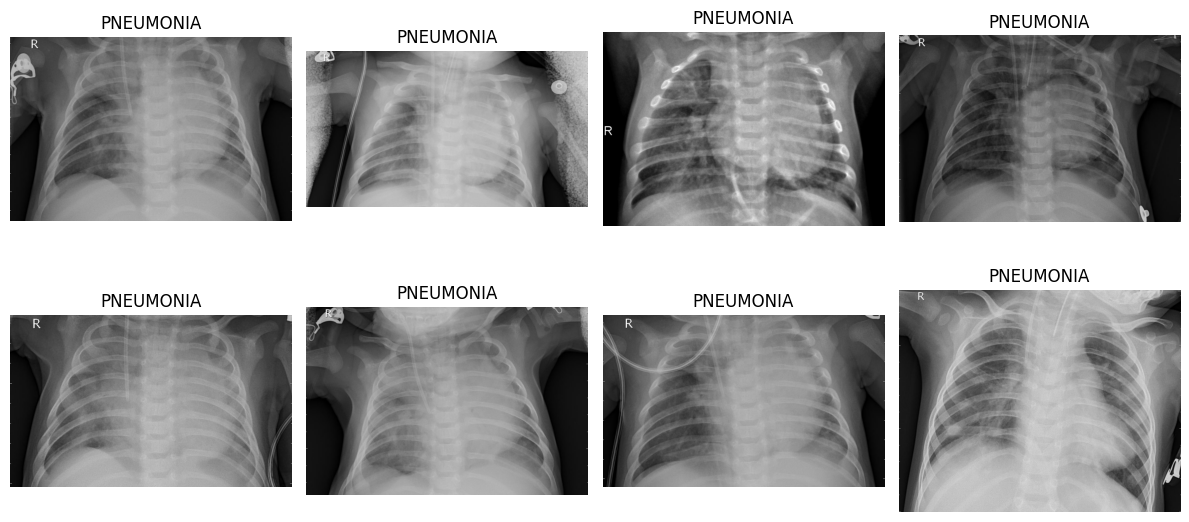

NORMAL
Displaying the first 8 images in NORMAL:


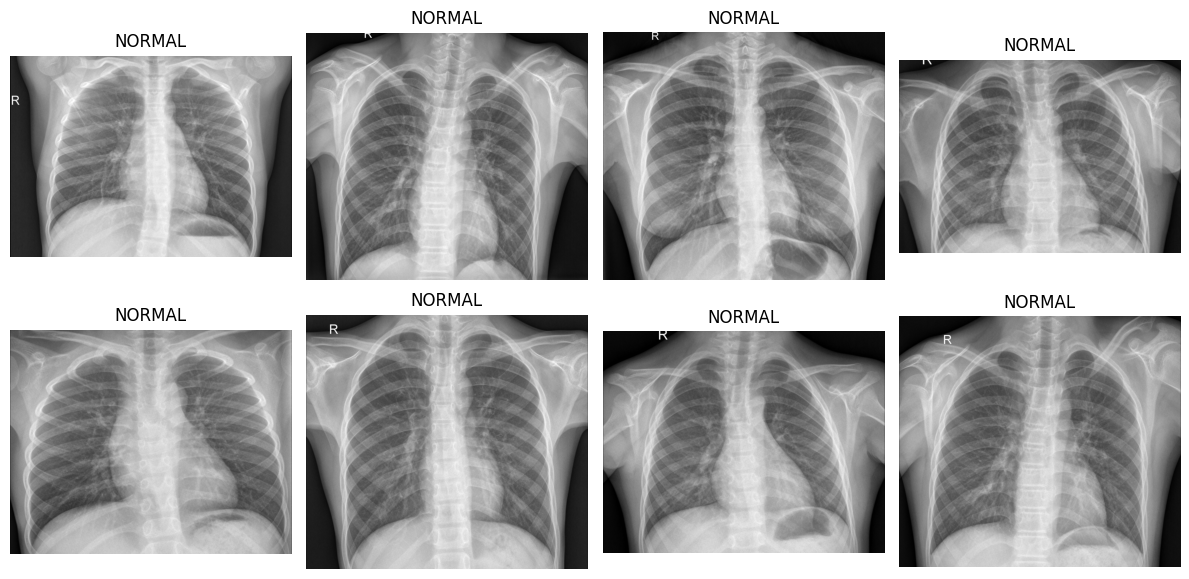

Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


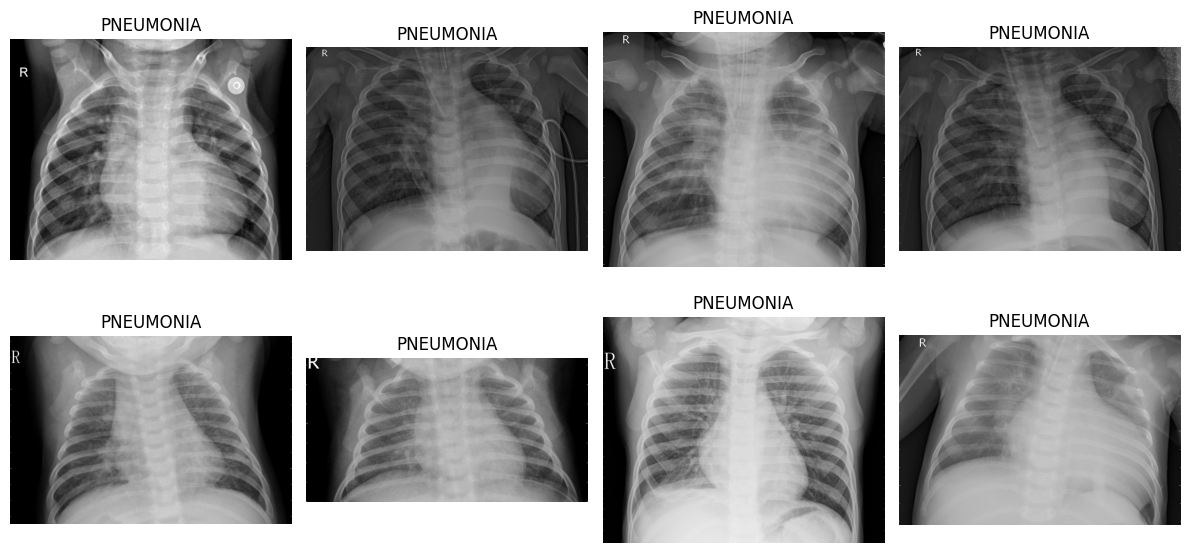

NORMAL
Displaying the first 8 images in NORMAL:


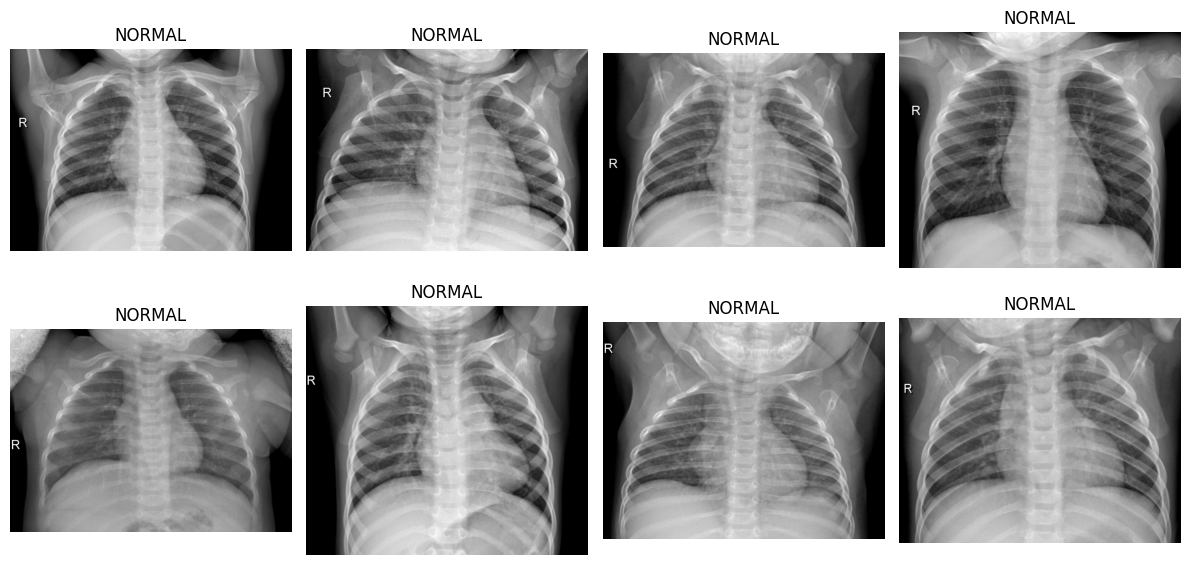

In [11]:
#View size of the iamges
# Iterate through the folder paths
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    files = [f for f in os.listdir(subfold_path)]
    #Display only the first 8 images
    print(f"Displaying the first 8 images in {folder}:")
    num_images = min(8, len(files))
    rows = (num_images + 3) // 4
    fig, axes = plt.subplots(rows, 4, figsize=(12,3 * rows))
    axes = axes.flatten()
   #Creating image plots for each image
    for i, file_ in enumerate(files[:num_images]):
      img_path = os.path.join(subfold_path, file_)
      img = cv2.imread(img_path)

      axes[i].imshow(img, cmap='gray')
      axes[i].axis('off')
      axes[i].set_title(folder)
    plt.tight_layout()
    plt.show()

Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
Displaying the first 8 images in NORMAL:


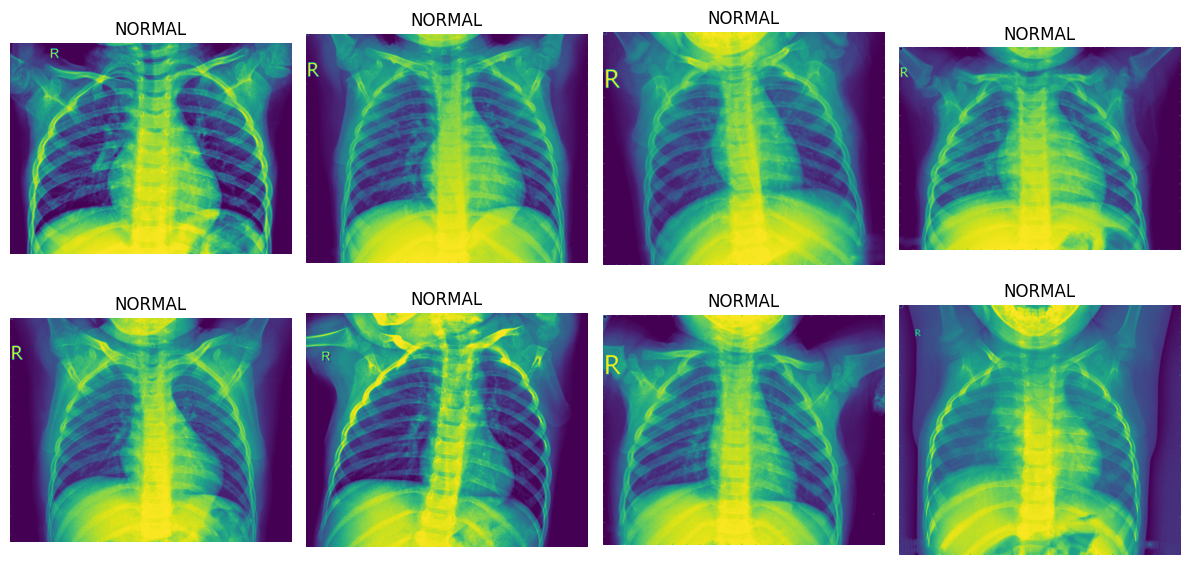

PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


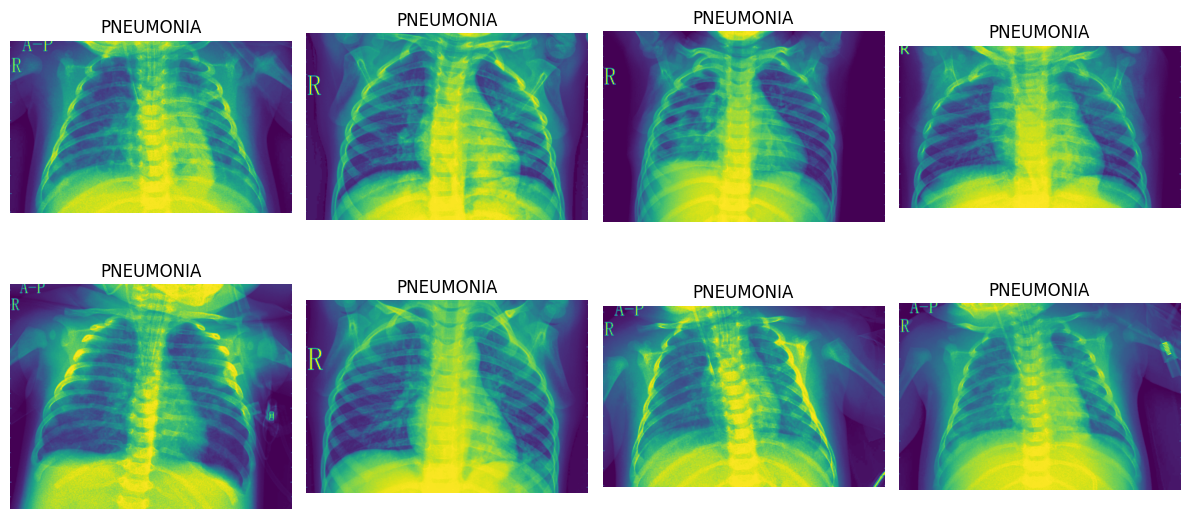

Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


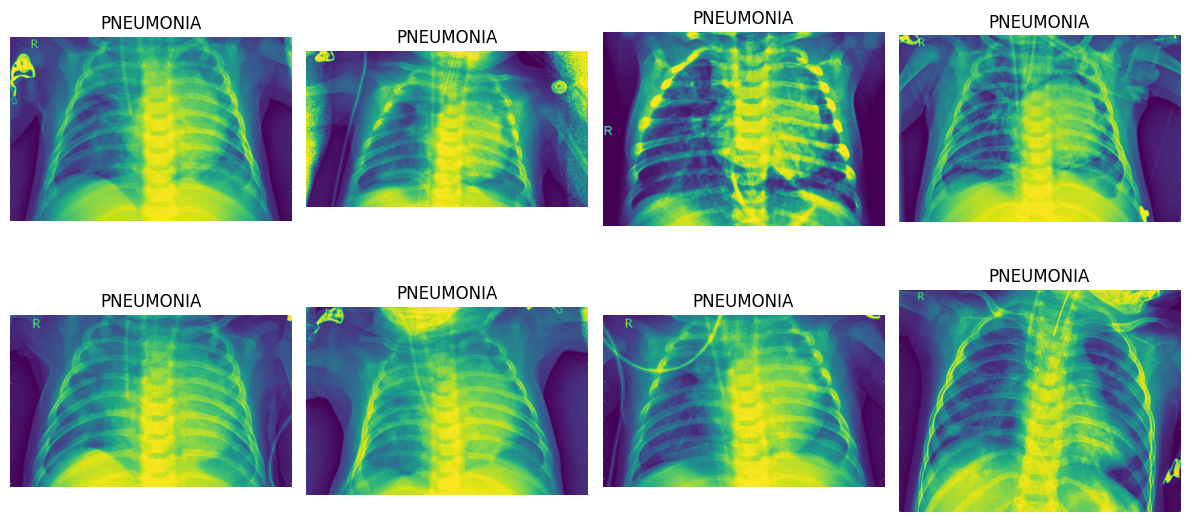

NORMAL
Displaying the first 8 images in NORMAL:


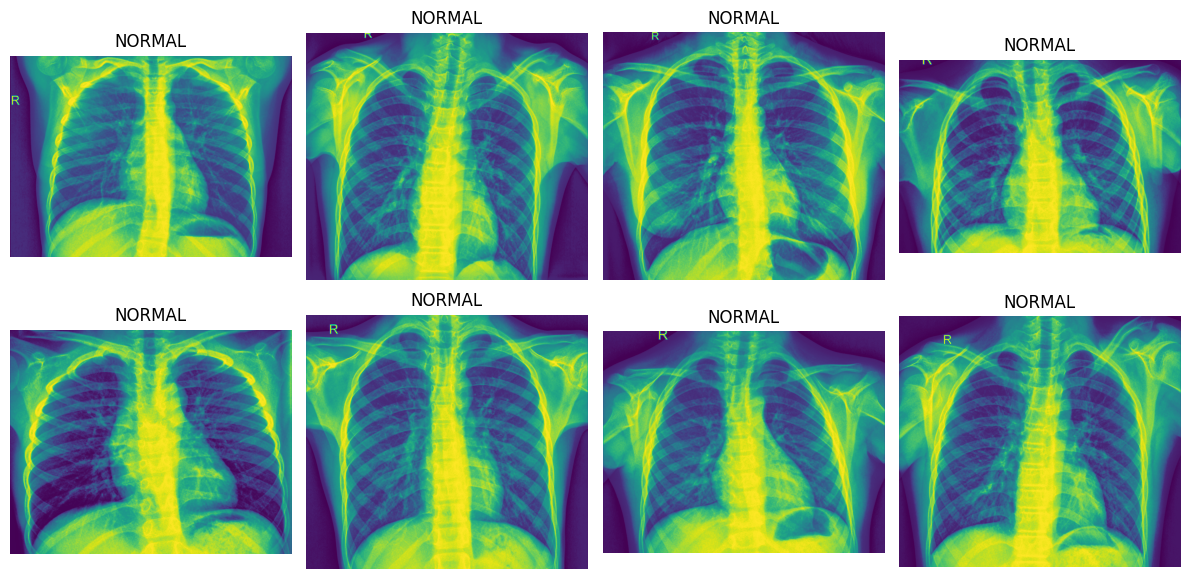

Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
Displaying the first 8 images in PNEUMONIA:


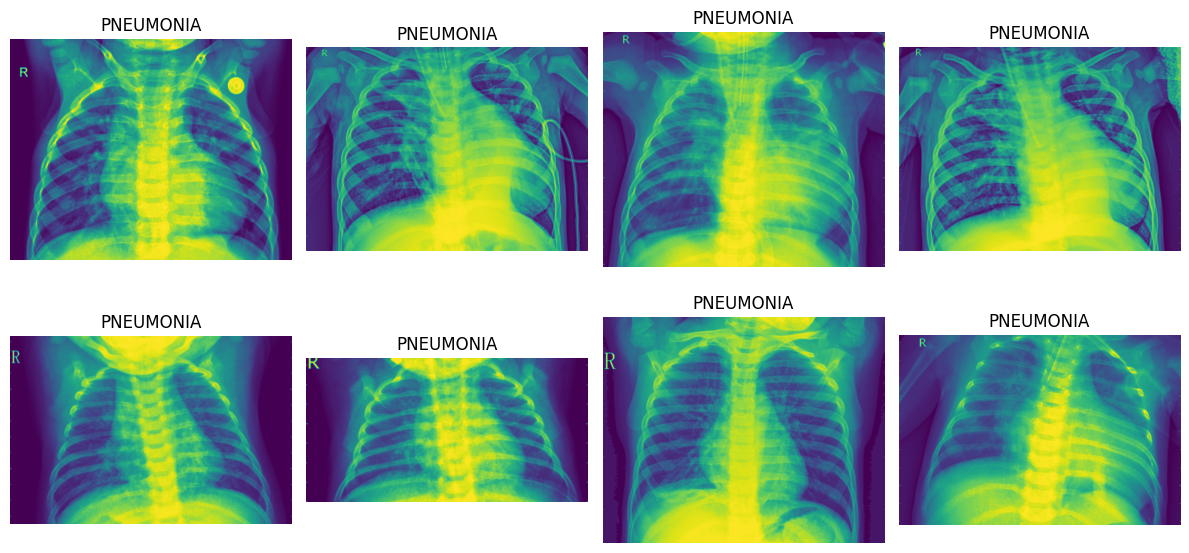

NORMAL
Displaying the first 8 images in NORMAL:


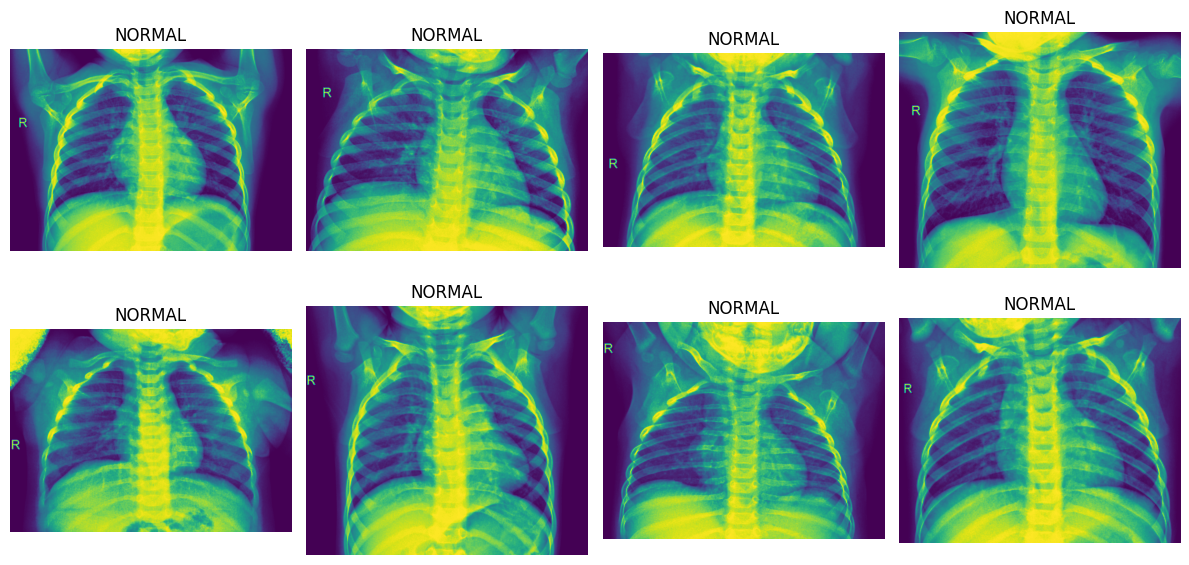

In [12]:
#View size of the iamges
# Iterate through the folder paths
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    files = [f for f in os.listdir(subfold_path)]
    #Display only the first 8 images
    print(f"Displaying the first 8 images in {folder}:")
    num_images = min(8, len(files))
    rows = (num_images + 3) // 4
    fig, axes = plt.subplots(rows, 4, figsize=(12,3 * rows))
    axes = axes.flatten()
   #Creating image plots for each image
    for i, file_ in enumerate(files[:num_images]):
      img_path = os.path.join(subfold_path, file_)
      img = cv2.imread(img_path)
      #Changing the image to grayscale
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #Apply histogram equalization to the grayscale image
      img = cv2.equalizeHist(img)
      #Apply Gaussian blur for noise reduction
      img = cv2.GaussianBlur(img, (5,5), 0)
      axes[i].imshow(img)
      axes[i].axis('off')
      axes[i].set_title(folder)
    plt.tight_layout()
    plt.show()

Illumination increases the visibilty of our images so we are going to use illuminated images for our model.

## DATA PREPARATION

We are going to check if our data has any duplicates by checking by comparing the content of the images files to see if they are identical.

In [13]:
def hash_file(file_path):
  #Instatiate the function
  hasher = hashlib.md5()
  with open(file_path, 'rb') as file:
    while True:
      data = file.read(65536)
      if not data:
        break
      hasher.update(data)
  return hasher.hexdigest()


def find_duplicate_images(directory):
  #Create a dictionary to store file hashes and their corresponding file paths
  file_hashes = {}
  duplicate_images = []

  for root, dirs, files in os.walk(directory):
    for file in files:
      file_path = os.path.join(root, file)
      file_hash = hash_file(file_path)

      if file_hash in file_hashes:
        duplicate_images.append((file_path, file_hashes[file_hash]))
      else:
        file_hashes[file_hash] = file_path

  return duplicate_images




In [14]:
#Chechking for duplicates in all subfolders
# Iterate through the folder paths
#A dictionary for storing duplicates
duplicate_dict = {}

for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    #Check for duplicate images in the current subfolder
    duplicate_images = find_duplicate_images(subfold_path)
    if duplicate_images:
      print(f"Duplicate images found in {folders}:")
      for duplicate_pair in duplicate_images:
        print("1. ", duplicate_pair[0])
        print("2. ", duplicate_pair[1])

        duplicate_dict[duplicate_pair[0]] = duplicate_pair[1]




Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
PNEUMONIA
Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
NORMAL
Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
NORMAL


There are duplicate images in the dataset provided which will have to be dropped.

In [15]:
#Iterate through the duplicate dictionary and removing the duplicates
for duplicate_file, original_file in duplicate_dict.items():
  os.remove(duplicate_file)
  print(f"Removed: {duplicate_file}")

In [16]:
#Checking if there are any duplicates left
for fol in fold_list:
  folders = [f for f in os.listdir(fol)]
  print(f"Folders inside {fol}:")
  for folder in folders:
    print(folder)
    subfold_path = os.path.join(fol, folder)
    #Check for duplicate images in the current subfolder
    duplicate_images = find_duplicate_images(subfold_path)
    if duplicate_images:
      print(f"Duplicate images found in {folders}:")
      for duplicate_pair in duplicate_images:
        print("1. ", duplicate_pair[0])
        print("2. ", duplicate_pair[1])

Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
PNEUMONIA
Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
NORMAL
Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
NORMAL


No pairs returned hence no duplicates, all have been removed.

Loading the data in a new variable names.We are going to resize all of our images(100 * 100) and make sure all of our images are in RGB format.

In [17]:
#Loading our data into new variables for ease of use and convenience.
#Creating list for storing our data
images = []
labels = []
#Creating a function importing the data
def load():
  global images
  global labels
  for fol in fold_list:
    folders = [f for f in os.listdir(fol)]
    print(f"Folders inside {fol}:")
    for folder in folders:
      print(folder)
      subfold_path = os.path.join(fol, folder)
      files = [f for f in os.listdir(subfold_path)]
      for file_ in files:
        image = cv2.imread(os.path.join(subfold_path, file_))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (100,100))
        image = cv2.equalizeHist(image)
        image = cv2.GaussianBlur(image, (5,5), 0)
        image = image / 255.
        images.append(image)
        labels.append(folder)

#Calling the function above
load()
images = np.array(images)
labels = np.array(labels)

Folders inside /content/drive/MyDrive/chest-xray/val:
NORMAL
PNEUMONIA
Folders inside /content/drive/MyDrive/chest-xray/test:
PNEUMONIA
NORMAL
Folders inside /content/drive/MyDrive/chest-xray/train:
PNEUMONIA
NORMAL


In [18]:
print("Images Shape:", images.shape)
print('Labels Shape :', labels.shape)

Images Shape: (5824, 100, 100)
Labels Shape : (5824,)


## EXPLORATORY DATA ANALYSIS

We can also check the distribution of values in our images dataset to make sure the normalization we did worked.

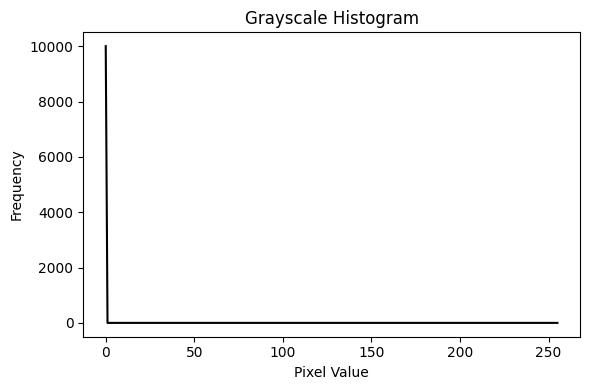

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to store histograms
gray_histograms = []

# Assuming 'images' is a NumPy array with shape (5824, 100, 100)
for image in images[:10]:
    # Convert the image to uint8 data type (if needed)
    image = image.astype(np.uint8)

    # Calculate a histogram for the grayscale image
    gray_hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # 256 bins for grayscale

    # Append the histogram to the list
    gray_histograms.append(gray_hist)

# Plot histograms for the first image in the dataset
plt.figure(figsize=(6, 4))

plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(gray_histograms[0], color='black')

plt.tight_layout()
plt.show()


In [22]:
#Checking our labels
labels[0:10]

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA'], dtype='<U9')

In [23]:
#Binarizing our labels
label = LabelEncoder()
labels_1 = label.fit_transform(labels)
labels_1

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
#Splitting our data to train, test and validation sets
X_train_1, X_test, y_train_1, y_test = train_test_split(images, labels_1, test_size=0.2, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, test_size=0.3, random_state=123)
#Checking the shape of our data
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3261, 100, 100)
X_val shape is  (1398, 100, 100)
X_test shape is  (1165, 100, 100)
y_train shape is  (3261,)
y_val shape is  (1398,)
y_test shape is  (1165,)


In [26]:
# Define the original image shape
original_height = 100
original_width = 100
original_channels = 1

#Saving the original dataset shape
original_shape_train = (X_train.shape[0], original_height, original_width, original_channels)
original_shape_val = (X_val.shape[0], original_height, original_width, original_channels)
original_shape_test = (X_test.shape[0], original_height, original_width, original_channels)


In [ ]:
#Reshape the image arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [27]:
# Reshape the labels for binary classification
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [28]:
#Checking shape of our dataset again
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3261, 100, 100)
X_val shape is  (1398, 100, 100)
X_test shape is  (1165, 100, 100)
y_train shape is  (3261, 1)
y_val shape is  (1398, 1)
y_test shape is  (1165, 1)


## MODELING AND EVALUATION

### Baseline Model

For our first baseline model we are going to build a Multi-Layer Perceptrons model for our image classification problem.

In [ ]:
#Instantiating the model and adding layers
base_model = models.Sequential()
base_model.add(layers.Dense(10000, activation='relu', input_shape = (10000, )))
base_model.add(layers.Dense(1000, activation = 'relu'))
base_model.add(layers.Dense(100, activation='relu'))
base_model.add(layers.Dense(10, activation='relu'))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
#Compile the model
base_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
#Fit the model and save the results
history = base_model.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 1s 55ms/step - loss: 0.1408 - accuracy: 0.9558 - val_loss: 0.2078 - val_accuracy: 0.9292
Epoch 2/150
26/26 [==============================] - 1s 48ms/step - loss: 0.0938 - accuracy: 0.9736 - val_loss: 0.1308 - val_accuracy: 0.9464
Epoch 3/150
26/26 [==============================] - 1s 46ms/step - loss: 0.0760 - accuracy: 0.9709 - val_loss: 0.1380 - val_accuracy: 0.9464
Epoch 4/150
26/26 [==============================] - 1s 39ms/step - loss: 0.0612 - accuracy: 0.9773 - val_loss: 0.1313 - val_accuracy: 0.9506
Epoch 5/150
26/26 [==============================] - 1s 33ms/step - loss: 0.0523 - accuracy: 0.9822 - val_loss: 0.1362 - val_accuracy: 0.9471
Epoch 6/150
26/26 [==============================] - 1s 30ms/step - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0.1275 - val_accuracy: 0.9499
Epoch 7/150
26/26 [==============================] - 1s 31ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.1287 - val_accuracy: 0.9485
Epoch 

Lets plot our loss and accuracy curves to inspect the model's performance and see if we detect any overfitting or other issues.We are going to create a function which we can apply to other model's results.

In [29]:
#Creating a function for plotting the loss and accuracy curves
def visualize_model_results(resls):
  res = resls.history
  plt.figure()
  plt.plot(res['val_accuracy'])
  plt.plot(res['accuracy'])
  plt.legend(['val_accuracy', 'accuracy'])
  plt.title('Accuracy for {results}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

  plt.figure()
  plt.plot(res['val_loss'])
  plt.plot(res['loss'])
  plt.legend(['val_loss', 'loss'])
  plt.title('Loss for {results}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()


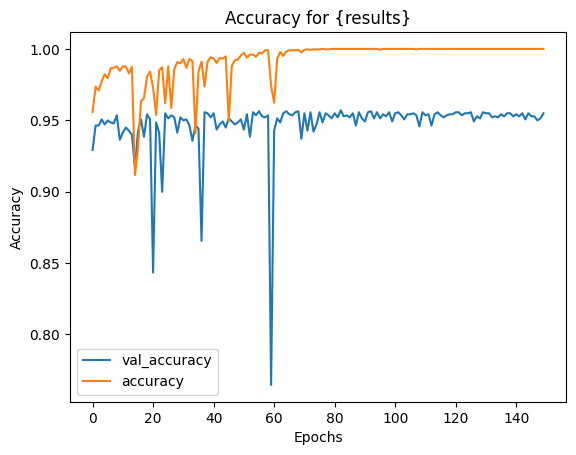

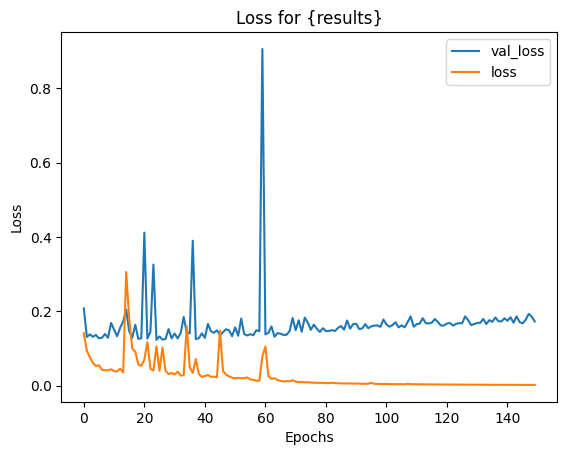

In [ ]:
#Plotting the curves
visualize_model_results(history)

The curves don't look right at all lets try some regularization techniques to see if it helps. It seems like we are overfitting the model.

### Model with Early Stopping

In [ ]:
#Instantiating the model and adding layers
model_stopping = models.Sequential()
model_stopping.add(layers.Dense(10000, activation='relu', input_shape = (10000, )))
model_stopping.add(layers.Dense(1000, activation = 'relu'))
model_stopping.add(layers.Dense(100, activation='relu'))
model_stopping.add(layers.Dense(10, activation='relu'))
model_stopping.add(layers.Flatten())
model_stopping.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model_stopping.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Defining callbacks
early_stopping = [EarlyStopping(monitor='val_loss', patience = 10),
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]



In [ ]:
#Fitting the model
model_stopping_results = model_stopping.fit(X_train,
                                            y_train,
                                            epochs=150,
                                            callbacks=early_stopping,
                                            batch_size=256,
                                            validation_data=(X_val, y_val))


Epoch 1/150
13/13 [==============================] - 10s 738ms/step - loss: 0.5767 - accuracy: 0.6992 - val_loss: 0.4945 - val_accuracy: 0.7253
Epoch 2/150
13/13 [==============================] - 1s 67ms/step - loss: 0.4823 - accuracy: 0.7636 - val_loss: 0.5455 - val_accuracy: 0.7253
Epoch 3/150
13/13 [==============================] - 9s 713ms/step - loss: 0.4368 - accuracy: 0.8004 - val_loss: 0.4148 - val_accuracy: 0.8999
Epoch 4/150
13/13 [==============================] - 13s 1s/step - loss: 0.4138 - accuracy: 0.8264 - val_loss: 0.3888 - val_accuracy: 0.7561
Epoch 5/150
13/13 [==============================] - 10s 830ms/step - loss: 0.3787 - accuracy: 0.8313 - val_loss: 0.3131 - val_accuracy: 0.9077
Epoch 6/150
13/13 [==============================] - 1s 59ms/step - loss: 0.3830 - accuracy: 0.8249 - val_loss: 0.3330 - val_accuracy: 0.8219
Epoch 7/150
13/13 [==============================] - 1s 54ms/step - loss: 0.3451 - accuracy: 0.8476 - val_loss: 0.3447 - val_accuracy: 0.8748
Ep

In [ ]:
#Load the best saved model
saved_model = load_model('best_model.h5')

In [ ]:
#Evaluating the model
results_train = saved_model.evaluate(X_train, y_train)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = saved_model.evaluate(X_test, y_test)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

102/102 [==============================] - 1s 7ms/step - loss: 0.1222 - accuracy: 0.9549
Training Loss: 0.122 
Training Accuracy: 0.955
----------
37/37 [==============================] - 0s 6ms/step - loss: 0.1454 - accuracy: 0.9442
Test Loss: 0.145 
Test Accuracy: 0.944


The model didnt run all the epochs(150) stopped at epoch 116. Our results generally look good we can continue and build more models and evaluate their perfomance

### Model with L2 Regularization

In [ ]:
#Instantiating the model and adding layers
model_l2 = models.Sequential()
model_l2.add(layers.Dense(10000, activation='relu', kernel_regularizer = regularizers.l2(0.005), input_shape = (10000, )))
model_l2.add(layers.Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.005)))
model_l2.add(layers.Dense(100, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
model_l2.add(layers.Dense(10, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
#Compiling the model
model_l2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit the model and save the results
model_l2_results = model_l2.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 3s 54ms/step - loss: 60.4544 - accuracy: 0.7384 - val_loss: 60.2305 - val_accuracy: 0.7253
Epoch 2/150
26/26 [==============================] - 1s 42ms/step - loss: 60.0562 - accuracy: 0.8062 - val_loss: 59.9056 - val_accuracy: 0.8627
Epoch 3/150
26/26 [==============================] - 1s 42ms/step - loss: 59.7404 - accuracy: 0.8040 - val_loss: 59.5866 - val_accuracy: 0.8419
Epoch 4/150
26/26 [==============================] - 1s 43ms/step - loss: 59.3737 - accuracy: 0.8384 - val_loss: 59.1835 - val_accuracy: 0.8934
Epoch 5/150
26/26 [==============================] - 1s 42ms/step - loss: 59.0311 - accuracy: 0.8629 - val_loss: 58.8026 - val_accuracy: 0.9099
Epoch 6/150
26/26 [==============================] - 1s 43ms/step - loss: 58.7081 - accuracy: 0.8669 - val_loss: 58.6379 - val_accuracy: 0.8176
Epoch 7/150
26/26 [==============================] - 1s 42ms/step - loss: 58.3920 - accuracy: 0.8770 - val_loss: 58.1877 - val_accuracy:

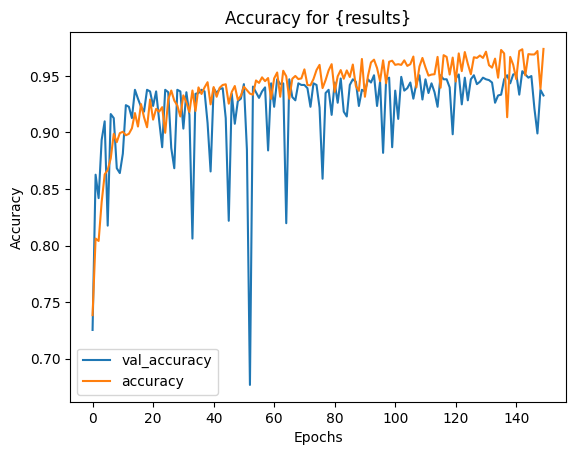

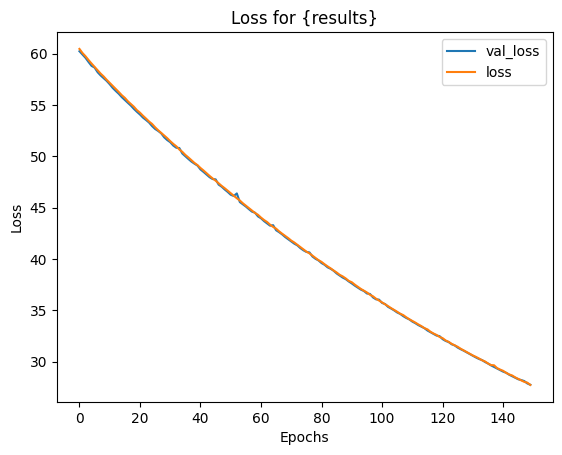

In [ ]:
#Plot the curves for the result
visualize_model_results(model_l2_results)

The results got even worse. We are going to try L1 regulizer to see its effect on the model

### Model with L1 Regularization

In [ ]:
#Instantiating the model and adding layers
model_l1 = models.Sequential()
model_l1.add(layers.Dense(10000, activation='relu', kernel_regularizer = regularizers.l1(0.005), input_shape = (10000, )))
model_l1.add(layers.Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l1(0.005)))
model_l1.add(layers.Dense(100, activation='relu', kernel_regularizer = regularizers.l1(0.005)))
model_l1.add(layers.Dense(10, activation='relu', kernel_regularizer = regularizers.l1(0.005)))
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model_l1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit the model and save the results
model_l1_results = model_l1.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 4s 66ms/step - loss: 4604.1802 - accuracy: 0.7538 - val_loss: 4244.2656 - val_accuracy: 0.8848
Epoch 2/150
26/26 [==============================] - 2s 59ms/step - loss: 3940.3462 - accuracy: 0.8175 - val_loss: 3608.2932 - val_accuracy: 0.7289
Epoch 3/150
26/26 [==============================] - 2s 59ms/step - loss: 3329.0444 - accuracy: 0.8212 - val_loss: 3024.7808 - val_accuracy: 0.8412
Epoch 4/150
26/26 [==============================] - 1s 55ms/step - loss: 2770.2131 - accuracy: 0.8228 - val_loss: 2493.7310 - val_accuracy: 0.7296
Epoch 5/150
26/26 [==============================] - 1s 53ms/step - loss: 2263.7878 - accuracy: 0.8418 - val_loss: 2014.8926 - val_accuracy: 0.8269
Epoch 6/150
26/26 [==============================] - 1s 53ms/step - loss: 1809.8239 - accuracy: 0.8255 - val_loss: 1588.6488 - val_accuracy: 0.8119
Epoch 7/150
26/26 [==============================] - 1s 53ms/step - loss: 1408.2837 - accuracy: 0.8166 - val_los

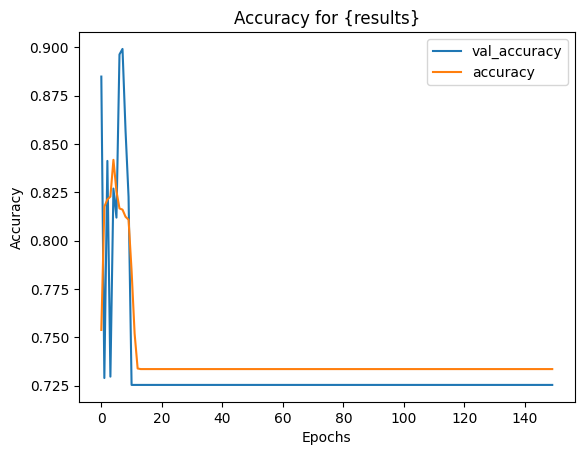

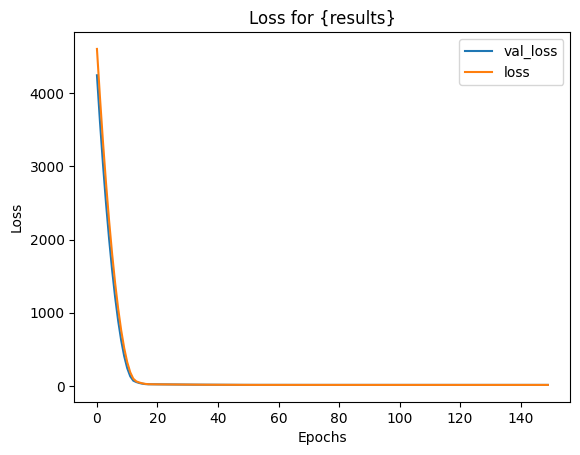

In [ ]:
#Plotting the curves
visualize_model_results(model_l1_results)

The results look more stable compared with l2 regularization model. We are going to different techniques to see the effect on the model.

### Dropout Regularization

In [ ]:
#Instantiating the model and adding layers
model_drop = models.Sequential()
model_drop.add(layers.Dropout(0.3, input_shape=(10000, )))
model_drop.add(layers.Dense(10000, activation='relu'))
model_drop.add(layers.Dropout(0.3))
model_drop.add(layers.Dense(1000, activation = 'relu'))
model_drop.add(layers.Dropout(0.3))
model_drop.add(layers.Dense(100, activation='relu'))
model_drop.add(layers.Dropout(0.3))
model_drop.add(layers.Dense(10, activation='relu'))
model_drop.add(layers.Dropout(0.3))
model_drop.add(layers.Flatten())
model_drop.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the model
model_drop.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit the model and save the results
model_drop_results = model_drop.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 2s 47ms/step - loss: 0.5884 - accuracy: 0.7136 - val_loss: 0.4924 - val_accuracy: 0.7253
Epoch 2/150
26/26 [==============================] - 1s 33ms/step - loss: 0.5169 - accuracy: 0.7403 - val_loss: 0.3753 - val_accuracy: 0.7611
Epoch 3/150
26/26 [==============================] - 1s 33ms/step - loss: 0.4848 - accuracy: 0.7562 - val_loss: 0.3297 - val_accuracy: 0.8047
Epoch 4/150
26/26 [==============================] - 1s 31ms/step - loss: 0.4260 - accuracy: 0.7863 - val_loss: 0.2912 - val_accuracy: 0.8999
Epoch 5/150
26/26 [==============================] - 1s 35ms/step - loss: 0.3868 - accuracy: 0.8197 - val_loss: 0.3085 - val_accuracy: 0.8598
Epoch 6/150
26/26 [==============================] - 1s 34ms/step - loss: 0.3874 - accuracy: 0.8320 - val_loss: 0.2805 - val_accuracy: 0.8727
Epoch 7/150
26/26 [==============================] - 1s 36ms/step - loss: 0.3440 - accuracy: 0.8375 - val_loss: 0.2984 - val_accuracy: 0.8591
Epoch 

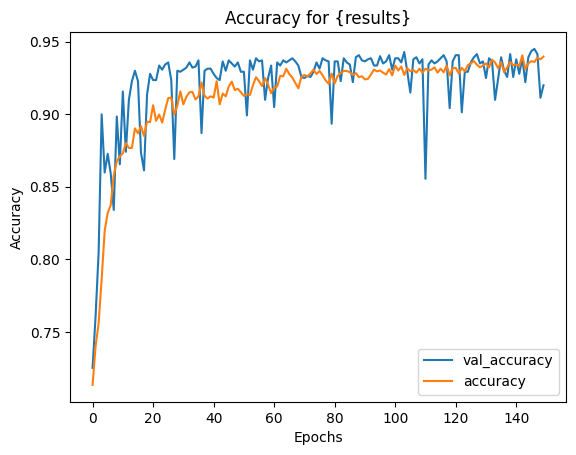

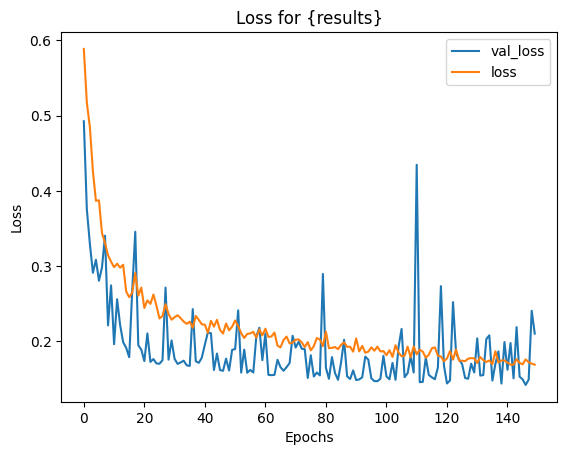

In [ ]:
#Plotting the curves
visualize_model_results(model_drop_results)

### Building a Convolution Neural Network

In [ ]:
#We will need to make sure our data shape is correct for cnn modelling
# Reshape back to the original shape
X_train = X_train.reshape(original_shape_train)
X_val = X_val.reshape(original_shape_val)
X_test = X_test.reshape(original_shape_test)

In [35]:
#Define the CNN model
cnn_model = models.Sequential()
#Convolutional Layer 1
cnn_model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(100, 100, 1)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))
#Convolutional layer 2
cnn_model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2,2)))
#Convolutional layer 3
cnn_model.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))
#Flatten the layers
cnn_model.add(layers.Flatten())
#Fully Connected Layers
cnn_model.add(layers.Dense(128, activation = 'relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(1, activation = 'sigmoid'))



In [36]:
#Compile the model
cnn_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [37]:
#Setting stopping criteria
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10),
                  ModelCheckpoint(filepath = 'cnn_best_model.h5', monitor = 'val_loss', save_best_only = True)]



In [38]:
#Fitting the model
cnn_model_results = cnn_model.fit(X_train,
                                  y_train,
                                  epochs = 150,
                                  callbacks = early_stopping,
                                  batch_size = 128,
                                  validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 4s 76ms/step - loss: 0.5342 - accuracy: 0.7286 - val_loss: 0.4650 - val_accuracy: 0.7969
Epoch 2/150
26/26 [==============================] - 1s 41ms/step - loss: 0.3349 - accuracy: 0.8491 - val_loss: 0.2233 - val_accuracy: 0.9142
Epoch 3/150
26/26 [==============================] - 1s 42ms/step - loss: 0.2474 - accuracy: 0.8976 - val_loss: 0.2135 - val_accuracy: 0.9227
Epoch 4/150
26/26 [==============================] - 1s 41ms/step - loss: 0.2408 - accuracy: 0.9040 - val_loss: 0.1764 - val_accuracy: 0.9378
Epoch 5/150
26/26 [==============================] - 1s 42ms/step - loss: 0.2094 - accuracy: 0.9157 - val_loss: 0.1665 - val_accuracy: 0.9356
Epoch 6/150
26/26 [==============================] - 1s 39ms/step - loss: 0.1943 - accuracy: 0.9206 - val_loss: 0.1764 - val_accuracy: 0.9328
Epoch 7/150
26/26 [==============================] - 2s 63ms/step - loss: 0.1804 - accuracy: 0.9301 - val_loss: 0.1463 - val_accuracy: 0.9456
Epoch 

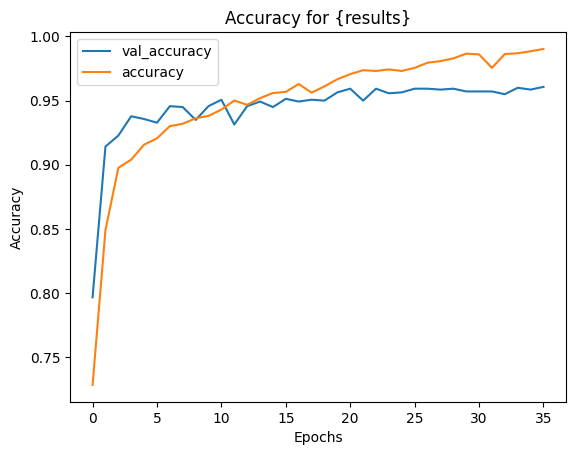

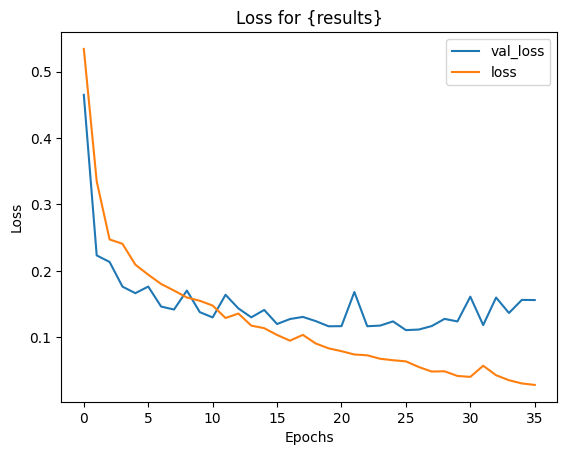

In [39]:
#Plotting the curves
visualize_model_results(cnn_model_results)

In [40]:
#Evaluate the model
results_train = cnn_model.evaluate(X_train, y_train)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = cnn_model.evaluate(X_test, y_test)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

102/102 [==============================] - 1s 5ms/step - loss: 0.0138 - accuracy: 0.9960
Training Loss: 0.0138 
Training Accuracy: 0.996
----------
37/37 [==============================] - 0s 5ms/step - loss: 0.1551 - accuracy: 0.9579
Test Loss: 0.155 
Test Accuracy: 0.958


In [42]:
#load trained model
best_model = load_model('cnn_best_model.h5')
#Making predictions using the model
y_pred = best_model.predict(X_test)

#Rounding off the results
y_pred_binary = np.round(y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred_binary, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

37/37 [==============================] - 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.92      0.93       326
     Class 1       0.97      0.98      0.97       839

    accuracy                           0.96      1165
   macro avg       0.95      0.95      0.95      1165
weighted avg       0.96      0.96      0.96      1165



Lets add a batch normalization layer to our model to see how the model performs.

In [22]:
#Define the CNN model
cnn_model_b = models.Sequential()
#Convolutional Layer 1
cnn_model_b.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(100, 100, 1)))
cnn_model_b.add(layers.BatchNormalization())
cnn_model_b.add(layers.MaxPooling2D(pool_size=(2,2)))
#Convolutional layer 2
cnn_model_b.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn_model_b.add(layers.BatchNormalization())
cnn_model_b.add(layers.MaxPooling2D(pool_size = (2,2)))
#Convolutional layer 3
cnn_model_b.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn_model_b.add(layers.BatchNormalization())
cnn_model_b.add(layers.MaxPooling2D(pool_size=(2,2)))
#Flatten the layers
cnn_model_b.add(layers.Flatten())
#Fully Connected Layers
cnn_model_b.add(layers.Dense(128, activation = 'relu'))
cnn_model_b.add(layers.BatchNormalization())
cnn_model_b.add(layers.Dropout(0.5))
cnn_model_b.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
#Compile the model
cnn_model_b.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [25]:
#Setting stopping criteria
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10),
                  ModelCheckpoint(filepath = 'cnn_bestbatch_model.h5', monitor = 'val_loss', save_best_only = True)]



In [26]:
#fitting the model
cnn_model_b_results = cnn_model_b.fit(X_train,
                                  y_train,
                                  epochs = 150,
                                  callbacks = early_stopping,
                                  batch_size = 128,
                                  validation_data=(X_val, y_val))

Epoch 1/150
26/26 [==============================] - 21s 100ms/step - loss: 0.4062 - accuracy: 0.8666 - val_loss: 1.2233 - val_accuracy: 0.7253
Epoch 2/150
26/26 [==============================] - 1s 54ms/step - loss: 0.1711 - accuracy: 0.9408 - val_loss: 3.8560 - val_accuracy: 0.7253
Epoch 3/150
26/26 [==============================] - 1s 53ms/step - loss: 0.1291 - accuracy: 0.9595 - val_loss: 5.8085 - val_accuracy: 0.7253
Epoch 4/150
26/26 [==============================] - 2s 59ms/step - loss: 0.1160 - accuracy: 0.9604 - val_loss: 6.2755 - val_accuracy: 0.7253
Epoch 5/150
26/26 [==============================] - 2s 58ms/step - loss: 0.0956 - accuracy: 0.9684 - val_loss: 5.1716 - val_accuracy: 0.7253
Epoch 6/150
26/26 [==============================] - 1s 55ms/step - loss: 0.0789 - accuracy: 0.9739 - val_loss: 2.7716 - val_accuracy: 0.7253
Epoch 7/150
26/26 [==============================] - 2s 59ms/step - loss: 0.0557 - accuracy: 0.9841 - val_loss: 2.2509 - val_accuracy: 0.7253
Epoc

In [28]:
#Evaluating the model
results_train = cnn_model_b.evaluate(X_train, y_train)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = cnn_model_b.evaluate(X_test, y_test)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

102/102 [==============================] - 1s 6ms/step - loss: 1.3575e-04 - accuracy: 1.0000
Training Loss: 0.000136 
Training Accuracy: 1.0
----------
37/37 [==============================] - 0s 10ms/step - loss: 0.1332 - accuracy: 0.9674
Test Loss: 0.133 
Test Accuracy: 0.967


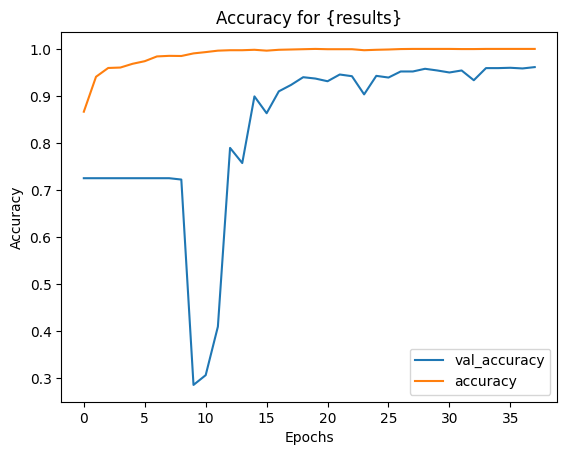

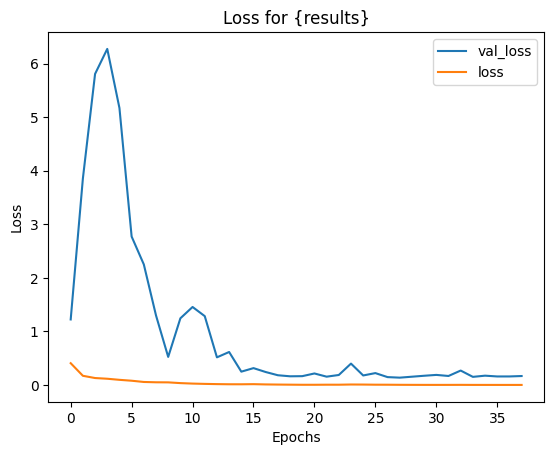

In [34]:
#Plotting the curves
visualize_model_results(cnn_model_results)

It seems adding the batch normalization layer has led to overfitting in our model. We are going to choose our cnn_model as the model of choice.

## CONCLUSION


We have managed to develop several models and we have choosed the best performing model. Image classification is crucial task as it deals with human health and an incorrect diagnosis can lead to severe repurcussion. Choosing a model we have to consider the recall and precision as well as f1-score. But for our model we are going to focus on recall  as it measures the ability of your model to capture all positive instances. We are going to prioritize recall over precision. We have met all of our objectives.Our best performing model is 'cnn_best_model.h5'

## RECOMMENDATIONS

We have successfully developed and trained an image classification model for our specific task. The model architecture, based on a Convolutional Neural Network (CNN), has proven effective in extracting relevant features from our image data. During testing, our model demonstrated promising results. However, as with any machine learning model, continuous evaluation and refinement are essential. We recommend periodically revisiting the dataset to ensure it remains representative of the target distribution and exploring data augmentation techniques to further improve model robustness. Lastly, considering the interpretability of the model and conducting error analysis can provide valuable insights for further enhancements. Overall, our image classification model serves as a strong foundation, and with ongoing refinement and attention to best practices, we anticipate achieving even better results in the future. Nairobi hospital should incorporate the model to their system as it will lead to faster diagnosis and cut costs for the hospital.